In [539]:
import matplotlib.pyplot as plt 
import seaborn           as sns 
import pandas            as pd
from sklearn                 import preprocessing
from sklearn.metrics         import confusion_matrix
from sklearn.preprocessing   import OneHotEncoder
from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model    import LinearRegression
from xgboost                 import XGBRegressor
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor
from sklearn                 import metrics
from sklearn.metrics         import r2_score
from sklearn.metrics         import mean_squared_error
from sklearn.ensemble        import VotingRegressor

In [540]:
films = pd.read_csv('/content/MDY_CSV.csv')
films = films.iloc[:,1:17]

In [541]:
films.head()

,star,original_title,budget,revenue,genres,original_language,popularity,production_companies,production_countries,year,month,day,runtime,spoken_languages,vote_count,vote_average
0,Colin Hanks,Alone With Her,1000000,10018,Crime,en,2.392367,The Weinstein Company,US,2006,4,28,78,en,20,6.2
1,Jason Statham,Chaos,20000000,10289,Drama,en,9.517950,Current Entertainment,CA,2005,1,17,106,en,278,6.1
2,Leo Jokela,Logan,135000,10474,Comedy,en,0.588872,logan films,US,2010,9,10,94,en,2,5.3
3,Diane Kruger,Forces spÃ©ciales,10000000,10759,Action,fr,5.358400,StudioCanal,FR,2011,11,2,109,fr,132,6.4
4,Melvil Poupaud,Laurence Anyways,9500000,12250,Drama,fr,8.594980,MK2 Productions,CA,2012,5,18,168,fr,190,7.7


In [542]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   star                  4978 non-null   object 
 1   original_title        4978 non-null   object 
 2   budget                4978 non-null   int64  
 3   revenue               4978 non-null   int64  
 4   genres                4978 non-null   object 
 5   original_language     4978 non-null   object 
 6   popularity            4978 non-null   float64
 7   production_companies  4978 non-null   object 
 8   production_countries  4977 non-null   object 
 9   year                  4978 non-null   int64  
 10  month                 4978 non-null   int64  
 11  day                   4978 non-null   int64  
 12  runtime               4978 non-null   int64  
 13  spoken_languages      4978 non-null   object 
 14  vote_count            4978 non-null   int64  
 15  vote_average         

In [543]:
films['runtime'].fillna(films['runtime'].mean(), inplace = True)
films = films.dropna()

In [544]:
C= films['vote_average'].mean()
C

6.301306007635123

In [545]:
m= films['vote_count'].quantile(0.8)
m

1075.8000000000002

In [546]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)
    

In [547]:
films['weighted_rating'] = films.apply(weighted_rating, axis=1)

In [548]:
def profit(x):
  R= x['revenue']
  B= x['budget']
  return (R-B)

In [549]:
films['profit'] = films.apply(profit, axis=1)

In [550]:
films_ = films.sort_values('weighted_rating', ascending=False).head(10)
films_

,star,original_title,budget,revenue,genres,original_language,popularity,production_companies,production_countries,year,month,day,runtime,spoken_languages,vote_count,vote_average,weighted_rating,profit
2305,Tim Robbins,The Shawshank Redemption,25000000,28341469,Drama,en,51.645403,Castle Rock Entertainment,US,1994,9,23,142,en,8358,8.5,8.249268,3341469
4479,Marlon Brando,The Godfather,6000000,245066411,Drama,en,41.109264,Paramount Pictures,US,1972,3,14,175,en,6024,8.5,8.166842,239066411
4951,Christian Bale,The Dark Knight,185000000,1004558444,Drama,en,123.167259,DC Comics,GB,2008,7,16,152,en,12269,8.3,8.138874,819558444
3685,Edward Snowden,Fight Club,63000000,100853753,Drama,en,63.869599,Twentieth Century Fox Film Corporation,DE,1999,10,15,139,en,9678,8.3,8.100053,37853753
4381,John Travolta,Pulp Fiction,8000000,213928762,Thriller,en,140.950236,Miramax Films,US,1994,9,10,154,en,8670,8.3,8.079372,205928762
4885,Tom Hanks,Forrest Gump,55000000,677945399,Comedy,en,48.307194,Paramount Pictures,US,1994,7,6,142,en,8147,8.2,7.978526,622945399
4921,Leonardo DiCaprio,Inception,160000000,825532764,Action,en,29.108149,Legendary Pictures,GB,2010,7,14,148,en,14075,8.1,7.972282,665532764
4883,Matthew McConaughey,Interstellar,165000000,675120017,Adventure,en,32.213481,Paramount Pictures,CA,2014,11,5,169,en,11187,8.1,7.942203,510120017
4832,Mark Hamill,The Empire Strikes Back,18000000,538400000,Adventure,en,19.470959,Lucasfilm,US,1980,5,17,124,en,5998,8.2,7.911242,520400000
4637,Liam Neeson,Schindler's List,22000000,321365567,Drama,en,41.725123,Universal Pictures,US,1993,11,29,195,de,4436,8.3,7.909892,299365567


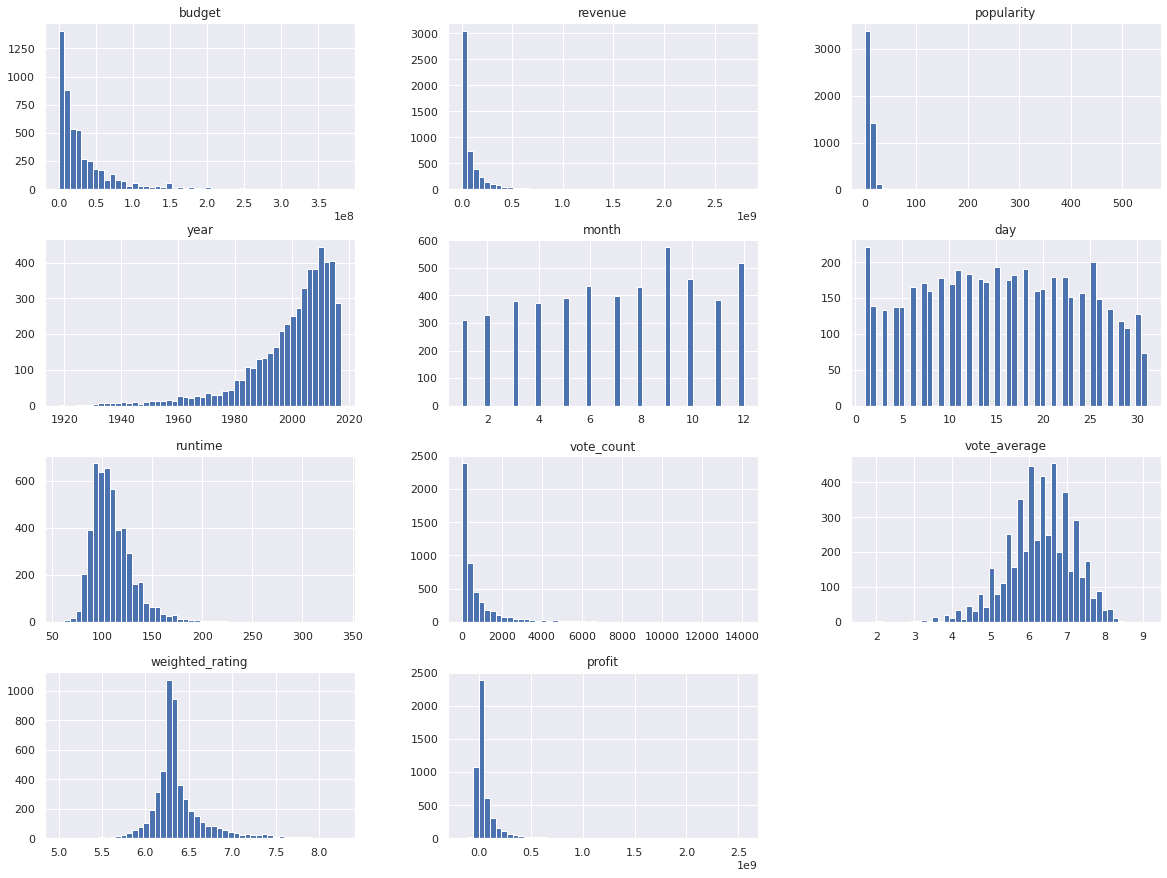

In [551]:
films.hist(bins=50, figsize=(20,15))
plt.show()


In [552]:
corr_matrix = films.corr()
corr_matrix["weighted_rating"].sort_values(ascending=False)

weighted_rating    1.000000
vote_average       0.738405
vote_count         0.573155
profit             0.334080
runtime            0.290717
revenue            0.288006
popularity         0.248653
month              0.118685
budget             0.027392
day                0.009906
year              -0.120639
Name: weighted_rating, dtype: float64

In [553]:
films['production_countries'].value_counts()

US    3256
GB     369
FR     208
CA     175
DE     172
IN     139
AU      93
JP      58
RU      53
IT      50
CN      47
ES      42
IE      27
HK      24
MX      20
KR      20
NZ      20
BE      19
DK      17
CZ      17
NL      13
CH       9
BR       9
AT       8
SE       8
FI       8
NO       7
AE       7
AR       7
IL       6
ZA       6
HU       5
TR       5
TH       5
PH       4
RO       4
ID       3
BG       3
CL       3
GR       3
PL       3
RS       3
SG       2
TW       2
IS       2
LU       2
IR       1
BS       1
DZ       1
MY       1
UA       1
QA       1
ML       1
UY       1
KH       1
MT       1
PE       1
PK       1
BF       1
EC       1
Name: production_countries, dtype: int64

In [554]:
films['star'].value_counts()

Nicolas Cage          38
Bruce Willis          34
Johnny Depp           31
Tom Hanks             31
Denzel Washington     29
                      ..
Naomie Harris          1
Kristina Orbakayte     1
Shu Qi                 1
Nigel Terry            1
Ken Maynard            1
Name: star, Length: 2198, dtype: int64

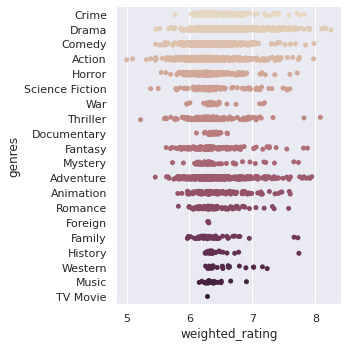

In [555]:
sns.catplot(x="weighted_rating", y="genres", palette="ch:.25",data=films)

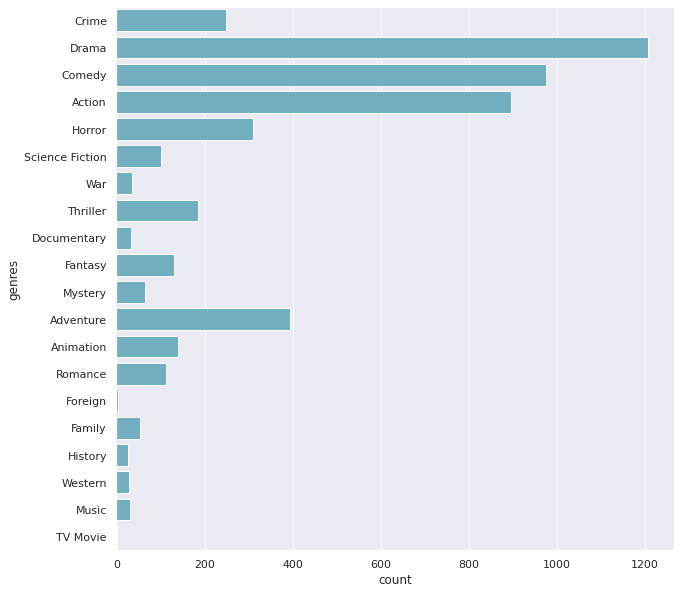

In [556]:

f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y="genres", data=films, color="c")

In [557]:
films_num = films[['budget','popularity','year','month','day','runtime','vote_count','vote_average']]
films_num.head(3)

,budget,popularity,year,month,day,runtime,vote_count,vote_average
0,1000000,2.392367,2006,4,28,78,20,6.2
1,20000000,9.517950,2005,1,17,106,278,6.1
2,135000,0.588872,2010,9,10,94,2,5.3


In [558]:
films_cat = films[['star','original_title','genres','original_language','production_companies','production_countries','spoken_languages']]
films_cat.head(3)

,star,original_title,genres,original_language,production_companies,production_countries,spoken_languages
0,Colin Hanks,Alone With Her,Crime,en,The Weinstein Company,US,en
1,Jason Statham,Chaos,Drama,en,Current Entertainment,CA,en
2,Leo Jokela,Logan,Comedy,en,logan films,US,en


In [559]:
films.isnull().sum()

star                    0
original_title          0
budget                  0
revenue                 0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
year                    0
month                   0
day                     0
runtime                 0
spoken_languages        0
vote_count              0
vote_average            0
weighted_rating         0
profit                  0
dtype: int64

In [560]:
(films== 0).sum(axis=0)

star                    0
original_title          0
budget                  0
revenue                 0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
year                    0
month                   0
day                     0
runtime                 0
spoken_languages        0
vote_count              0
vote_average            0
weighted_rating         0
profit                  9
dtype: int64

In [561]:
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4977 entries, 0 to 4977
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   star                  4977 non-null   object 
 1   original_title        4977 non-null   object 
 2   budget                4977 non-null   int64  
 3   revenue               4977 non-null   int64  
 4   genres                4977 non-null   object 
 5   original_language     4977 non-null   object 
 6   popularity            4977 non-null   float64
 7   production_companies  4977 non-null   object 
 8   production_countries  4977 non-null   object 
 9   year                  4977 non-null   int64  
 10  month                 4977 non-null   int64  
 11  day                   4977 non-null   int64  
 12  runtime               4977 non-null   int64  
 13  spoken_languages      4977 non-null   object 
 14  vote_count            4977 non-null   int64  
 15  vote_average         

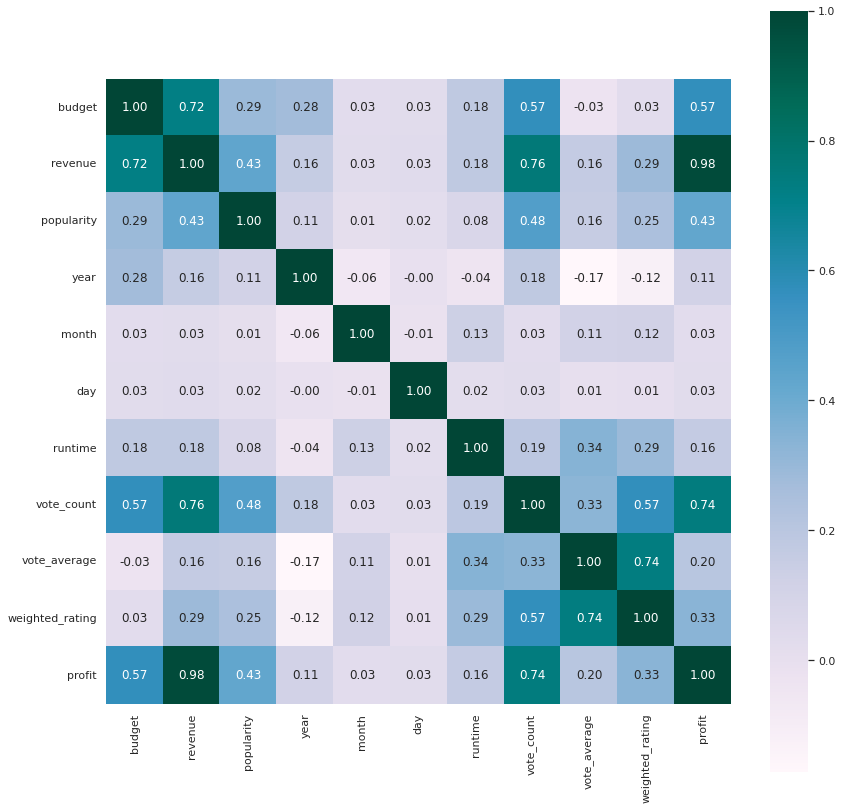

In [562]:
sns.set()
films_correlation = films.corr()
plt.figure(figsize=(14,14))
sns.heatmap(films_correlation,square=True, fmt='.2f',annot=True, annot_kws={'size':12}, cmap='PuBuGn')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


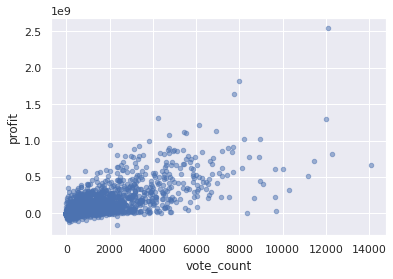

In [563]:
films.plot(kind="scatter", x="vote_count", y="profit",alpha=0.5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


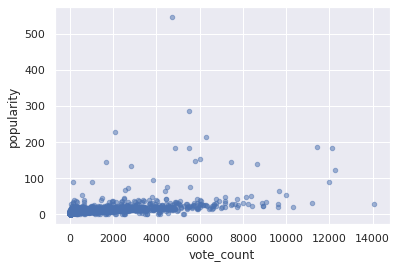

In [564]:
films.plot(kind="scatter", x="vote_count", y="popularity",alpha=0.5)

In [565]:
_1Hot_encoder = OneHotEncoder()
#### Star
#films_star = _1Hot_encoder.fit_transform(films.star.values.reshape(-1,1)).toarray()
#Films_OneHot_star = pd.DataFrame(films_star, columns = ["star"+str(int(i)) for i in range(2198)]) 
#films = pd.concat([films, Films_OneHot_star], axis=1) 
#films= films.drop(['star'], axis=1) 
#### Original Title
#films_original_title = _1Hot_encoder.fit_transform(films.original_title.values.reshape(-1,1)).toarray()
#Films_OneHot_original_title = pd.DataFrame(films_original_title, columns = ["original_title"+str(int(i)) for i in range(4892)]) 
#films = pd.concat([films, Films_OneHot_original_title], axis=1) 
#films= films.drop(['original_title'], axis=1) 
#### Original Language
films_original_language = _1Hot_encoder.fit_transform(films.original_language.values.reshape(-1,1)).toarray()
Films_OneHot_original_language = pd.DataFrame(films_original_language, columns = ["original_language"+str(int(i)) for i in range(35)]) 
films = pd.concat([films, Films_OneHot_original_language], axis=1) 
films= films.drop(['original_language'], axis=1) 
#### production Companies
#films_production_companies = _1Hot_encoder.fit_transform(films.production_companies.values.reshape(-1,1)).toarray()
#Films_OneHot_production_companies = pd.DataFrame(films_production_companies, columns = ["production_companies"+str(int(i)) for i in range(1277)]) 
#films = pd.concat([films, Films_OneHot_production_companies], axis=1) 
#films= films.drop(['production_companies'], axis=1) 
#### produciton countries
films_production_countries = _1Hot_encoder.fit_transform(films.production_countries.values.reshape(-1,1)).toarray()
Films_OneHot_production_countries = pd.DataFrame(films_production_countries, columns = ["production_countries"+str(int(i)) for i in range(61)]) 
films = pd.concat([films, Films_OneHot_production_countries], axis=1) 
films= films.drop(['production_countries'], axis=1) 
#### Genres
films_genres = _1Hot_encoder.fit_transform(films.genres.values.reshape(-1,1)).toarray()
Films_OneHot_genres = pd.DataFrame(films_genres, columns = ["genres"+str(int(i)) for i in range(21)]) 
films = pd.concat([films, Films_OneHot_genres], axis=1) 
films= films.drop(['genres'], axis=1) 
#### Spoken languages
films_spoken_languages = _1Hot_encoder.fit_transform(films.spoken_languages.values.reshape(-1,1)).toarray()
Films_OneHot_spoken_languages = pd.DataFrame(films_spoken_languages, columns = ["spoken_languages"+str(int(i)) for i in range(61)]) 
films = pd.concat([films, Films_OneHot_spoken_languages], axis=1) 
films= films.drop(['spoken_languages'], axis=1)  

In [566]:
Scaler = MinMaxScaler()
films["budget"] = Scaler.fit_transform(films[["budget"]])
films["popularity"] = Scaler.fit_transform(films[["popularity"]])
films["year"] = Scaler.fit_transform(films[["year"]])
films["month"] = Scaler.fit_transform(films[["month"]])
films["day"] = Scaler.fit_transform(films[["day"]])
films["runtime"] = Scaler.fit_transform(films[["runtime"]])
films["vote_count"] = Scaler.fit_transform(films[["vote_count"]])
films["vote_average"] = Scaler.fit_transform(films[["vote_average"]])
films["weighted_rating"] = Scaler.fit_transform(films[["weighted_rating"]])
films["profit"] = Scaler.fit_transform(films[["profit"]])

In [567]:
#films_star

In [568]:
#films_original_title

In [569]:
films_production_countries

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [570]:
#films_production_companies

In [571]:
films_original_language

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [572]:
films_genres

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [573]:
films_spoken_languages

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [574]:
films_prepared = films.drop(columns=['star','original_title','production_companies','weighted_rating'],axis=1)
films_label = films['weighted_rating'] 
films_label.head()

0    0.399556
1    0.387396
2    0.399553
3    0.403447
4    0.464779
Name: weighted_rating, dtype: float64

In [575]:
films_prepared.head()

,budget,revenue,popularity,year,month,day,runtime,vote_count,vote_average,profit,original_language0,original_language1,original_language2,original_language3,original_language4,original_language5,original_language6,original_language7,original_language8,original_language9,original_language10,original_language11,original_language12,original_language13,original_language14,original_language15,original_language16,original_language17,original_language18,original_language19,original_language20,original_language21,original_language22,original_language23,original_language24,original_language25,original_language26,original_language27,original_language28,original_language29,...,spoken_languages21,spoken_languages22,spoken_languages23,spoken_languages24,spoken_languages25,spoken_languages26,spoken_languages27,spoken_languages28,spoken_languages29,spoken_languages30,spoken_languages31,spoken_languages32,spoken_languages33,spoken_languages34,spoken_languages35,spoken_languages36,spoken_languages37,spoken_languages38,spoken_languages39,spoken_languages40,spoken_languages41,spoken_languages42,spoken_languages43,spoken_languages44,spoken_languages45,spoken_languages46,spoken_languages47,spoken_languages48,spoken_languages49,spoken_languages50,spoken_languages51,spoken_languages52,spoken_languages53,spoken_languages54,spoken_languages55,spoken_languages56,spoken_languages57,spoken_languages58,spoken_languages59,spoken_languages60
0,0.002618,10018.0,0.004314,0.888889,0.272727,0.900000,0.074733,0.001350,0.608108,0.060633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.052619,10289.0,0.017330,0.878788,0.000000,0.533333,0.174377,0.019682,0.594595,0.053639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000342,10474.0,0.001020,0.929293,0.727273,0.300000,0.131673,0.000071,0.486486,0.060952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.026303,10759.0,0.009732,0.939394,0.909091,0.033333,0.185053,0.009308,0.635135,0.057320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.024987,12250.0,0.015644,0.949495,0.363636,0.566667,0.395018,0.013429,0.810811,0.057505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [576]:
films_prepared = films_prepared.apply(pd.to_numeric, errors='coerce')
films_label = films_label.apply(pd.to_numeric, errors='coerce')

In [577]:
films_prepared.fillna(0, inplace=True)
films_label.fillna(0, inplace=True)


In [578]:
films_train, films_test, label_train, label_test = train_test_split(films_prepared, films_label, test_size=0.20)

In [579]:
LinearRegressor_Test = LinearRegression()
LinearRegressor_Test.fit(films_train,label_train)
LinearRegressor_Test_prediction = LinearRegressor_Test.predict(films_test)
LinearRegressor_Test_r2score = r2_score(label_test,LinearRegressor_Test_prediction)
rmse = mean_squared_error(label_test, LinearRegressor_Test_prediction, squared=False)
print("LinearRegressor r2.score: (Test)\n", LinearRegressor_Test_r2score)
print("LinearRegressor rmse: (Test)\n", rmse)

LinearRegressor r2.score: (Test)
 0.6993649904849284
LinearRegressor rmse: (Test)
 0.05319236753408407


In [580]:
XGBoostRegressor_Test = XGBRegressor()
XGBoostRegressor_Test.fit(films_train, label_train)
XGBoostRegressor_Test_prediction = XGBoostRegressor_Test.predict(films_test)
XGBoostRegressor_Test_r2score = r2_score(label_test,XGBoostRegressor_Test_prediction)
rmse = mean_squared_error(label_test, XGBoostRegressor_Test_prediction, squared=False)
print("XGBoostRegressor r2.score: (Test)\n", XGBoostRegressor_Test_r2score)
print("XGBoostRegressor rmse: (Test)\n", rmse)

[20:30:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoostRegressor r2.score: (Test)
 0.9908434914514253
XGBoostRegressor rmse: (Test)
 0.009283131372467626


In [581]:
DecisionTreeRegressor_Test = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
DecisionTreeRegressor_Test.fit(films_train,label_train)
DecisionTreeRegressor_Test_prediction = DecisionTreeRegressor_Test.predict(films_test)
DecisionTreeRegressor_Test_r2score = r2_score(label_test,DecisionTreeRegressor_Test_prediction)
rmse = mean_squared_error(label_test, DecisionTreeRegressor_Test_prediction, squared=False)
print("DecisionTreeRegressor r2.score: (Test)\n", DecisionTreeRegressor_Test_r2score)
print("DecisionTreeRegressor rmse: (Test)\n", rmse)

DecisionTreeRegressor r2.score: (Test)
 0.9544667978832198
DecisionTreeRegressor rmse: (Test)
 0.02070111035153287


In [582]:
RandomForestRegressor_Test = RandomForestRegressor()
RandomForestRegressor_Test.fit(films_train, label_train)
RandomForestRegressor_Test_prediction = RandomForestRegressor_Test.predict(films_test)
RandomForestRegressor_Test_r2score = r2_score(RandomForestRegressor_Test_prediction, label_test)
rmse = mean_squared_error(label_test, RandomForestRegressor_Test_prediction, squared=False)
print("RandomForestRegressor r2.score: (Test)\n",RandomForestRegressor_Test_r2score)
print("RandomForestRegressor rmse: (Test)\n", rmse)

RandomForestRegressor r2.score: (Test)
 0.9980960412006428
RandomForestRegressor rmse: (Test)
 0.004215202934612939


In [583]:
VotingRegressor_Test = VotingRegressor([('lr', LinearRegressor_Test), ('xgb', XGBoostRegressor_Test), ('dt', DecisionTreeRegressor_Test), ('rf', RandomForestRegressor_Test)])
VotingRegressor_Test.fit(films_train, label_train)
VotingRegressor_Test_prediction = VotingRegressor_Test.predict(films_test)
VotingRegressor_Test__r2score = r2_score(VotingRegressor_Test_prediction, label_test)
rmse = mean_squared_error(label_test, VotingRegressor_Test_prediction, squared=False)
print("VotingRegressor r2.score: (Test)\n",VotingRegressor_Test__r2score)
print("VotingRegressor rmse: (Test)\n", rmse)


[20:30:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
VotingRegressor r2.score: (Test)
 0.968593950136225
VotingRegressor rmse: (Test)
 0.016022696910784787


In [584]:
LinearRegressor_Train = LinearRegression()
LinearRegressor_Train.fit(films_train,label_train)
LinearRegressor_Train_prediction = LinearRegressor_Train.predict(films_train)
LinearRegressor_Train_r2score = r2_score(label_train,LinearRegressor_Train_prediction)
rmse = mean_squared_error(label_train, LinearRegressor_Train_prediction, squared=False)
print("LinearRegressor r2.score: (Train)\n", LinearRegressor_Train_r2score)
print("LinearRegressor rmse: (Train)\n", rmse)

LinearRegressor r2.score: (Train)
 0.7406919645425246
LinearRegressor rmse: (Train)
 0.050536331244627364


In [585]:
XGBoostRegressor_Train = XGBRegressor()
XGBoostRegressor_Train.fit(films_train, label_train)
XGBoostRegressor_Train_prediction = XGBoostRegressor_Train.predict(films_train)
XGBoostRegressor_Train_r2score = r2_score(label_train,XGBoostRegressor_Train_prediction)
rmse = mean_squared_error(label_train, XGBoostRegressor_Train_prediction, squared=False)
print("XGBoostRegressor r2.score: (Train)\n", XGBoostRegressor_Train_r2score)
print("XGBoostRegressor rmse: (Train)\n", rmse)

[20:30:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoostRegressor r2.score: (Train)
 0.993987976115687
XGBoostRegressor rmse: (Train)
 0.007694954774217019


In [586]:
DecisionTreeRegressor_Train = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
DecisionTreeRegressor_Train.fit(films_train,label_train)
DecisionTreeRegressor_Train_prediction = DecisionTreeRegressor_Train.predict(films_train)
DecisionTreeRegressor_Train_r2score = r2_score(label_train,DecisionTreeRegressor_Train_prediction)
rmse = mean_squared_error(label_train, DecisionTreeRegressor_Train_prediction, squared=False)
print("DecisionTreeRegressor r2.score: (Train)\n", DecisionTreeRegressor_Train_r2score)
print("DecisionTreeRegressor rmse: (Train)\n", rmse)

DecisionTreeRegressor r2.score: (Train)
 0.9580943489737319
DecisionTreeRegressor rmse: (Train)
 0.020315710667882278


In [587]:
RandomForestRegressor_Train = RandomForestRegressor()
RandomForestRegressor_Train.fit(films_train, label_train)
RandomForestRegressor_Train_prediction = RandomForestRegressor_Train.predict(films_train)
RandomForestRegressor_Train_r2score = r2_score(RandomForestRegressor_Train_prediction, label_train)
rmse = mean_squared_error(label_train, RandomForestRegressor_Train_prediction, squared=False)
print("RandomForestRegressor r2.score: (Train)\n", RandomForestRegressor_Train_r2score)
print("RandomForestRegressor rmse: (Train)\n", rmse)

RandomForestRegressor r2.score: (Train)
 0.9990191199061865
RandomForestRegressor rmse: (Train)
 0.00308958029127208


In [588]:
VotingRegressor_Train = VotingRegressor([('lr', LinearRegressor_Train), ('xgb', XGBoostRegressor_Train), ('dt', DecisionTreeRegressor_Train), ('rf', RandomForestRegressor_Train)])
VotingRegressor_Train.fit(films_train, label_train)
VotingRegressor_Train_prediction = VotingRegressor_Test.predict(films_train)
VotingRegressor_Train__r2score = r2_score(VotingRegressor_Train_prediction, label_train)
rmse = mean_squared_error(label_train, VotingRegressor_Train_prediction, squared=False)
print("VotingRegressor r2.score: (Train)\n",VotingRegressor_Train__r2score)
print("VotingRegressor rmse: (Train)\n", rmse)


[20:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
VotingRegressor r2.score: (Train)
 0.9714181013583701
VotingRegressor rmse: (Train)
 0.015572627252503532
